# Import Libraries

In [48]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [49]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

pd.set_option('display.float_format', lambda x: '%.4f' % x) 

#  Reading the Data

In [50]:
application_data = pd.read_csv("application_data.csv")
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,NaN,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,NaN,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559,0.

In [51]:
previous_data = pd.read_csv("previous_application.csv")
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,0.1828,0.8673,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,NaN,607500.0000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,NaN,112500.0000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,NaN,450000.0000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,NaN,337500.0000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
application_data.shape

(307511, 122)

In [53]:
previous_data.shape

(1670214, 37)

## Understanding and Inspecting the Data

### For application_data Dataframe

In [54]:
# information for application_data
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [55]:
application_data.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [56]:
# idea about numerical columns 
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,104582.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307509.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,134133.0000,306851.0000,246546.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,159080.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,278180.5186,0.0807,0.4171,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-16036.9951,63815.0459,-4986.1203,-2994.2024,12.0611,1.0000,0.8199,0.1994,0.9981,0.2811,0.0567,2.1527,2.0525,2.0315,12.0634,0.0151,0.0508,0.0407,0.0782,0.2305,0.1796,0.5021,0.5144,0.5109,0.1174,0.0884,0.9777,0.7525,0.0446,0.0789,0.1497,0.2263,0.2319,0.0663,0.1008,0.1074,0.0088,0.0284,0.1142,0.0875,0.9771,0.7596,0.0426,0.0745,0.1452,0.2223,0.2281,0.0650,0.1056,0.1060,0.0081,0.0270,0.1178,0.0880,0.9778,0.7557,0.0446,0.0781,0.1492,0.2259,0.2316,0.0672,0.1020,0.1086,0.0087,0.0282,0.1025,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0000,0.7100,0.0001,0.0151,0.0881,0.0002,0.0814,0.0039,0.0000,0.0039,0.0000,0.0035,0.0029,0.0012,0.0099,0.0003,0.0081,0.0006,0.0005,0.0003,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,102790.1753,0.2724,

### For previous_data Dataframe

In [57]:
# information for previous_data

previous_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [58]:
# idea about numerical columns 

previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.0000,1670214.0000,1297979.0000,1670214.0000,1670213.0000,774370.0000,1284699.0000,1670214.0000,1670214.0000,774370.0000,5951.0000,5951.0000,1670214.0000,1670214.0000,1297984.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000
mean,1923089.1353,278357.1741,15955.1207,175233.8604,196114.0212,6697.4021,227847.2793,12.4842,0.9965,0.0796,0.1884,0.7735,-880.6797,313.9511,16.0541,342209.8550,13826.2693,33767.7741,76582.4031,81992.3438,0.3326
std,532597.9587,102814.8238,14782.1373,292779.7624,318574.6165,20921.4954,315396.5579,3.3340,0.0593,0.1078,0.0877,0.1009,779.0997,7127.4435,14.5673,88916.1158,72444.8697,106857.0348,149647.4151,153303.5167,0.4711
min,1000001.0000,100001.0000,0.0000,0.0000,0.0000,-0.9000,0.0000,0.0000,0.0000,-0.0000,0.0348,0.3732,-2922.0000,-1.0000,0.0000,-2922.0000,-2892.0000,-2801.0000,-2889.0000,-2874.0000,0.0000
25%,1461857.2500,189329.0000,6321.7800,18720.0000,24160.5000,0.0000,50841.0000,10.0000,1.0000,0.0000,0.1607,0.7156,-1300.0000,-1.0000,6.0000,365243.0000,-1628.0000,-1242.0000,-1314.0000,-1270.0000,0.0000
50%,1923110.5000,278714.5000,11250.0000,71046.0000,80541.0000,1638.0000,112320.0000,12.0000,1.0000,0.0516,0.1891,0.8351,-581.0000,3.0000,12.0000,365243.0000,-831.0000,-361.0000,-537.0000,-499.0000,0.0000
75%,2384279.7500,367514.0000,20658.4200,180360.0000,216418.5000,7740.0000,234000.0000,15.0000,1.0000,0.1089,0.1933,0.8525,-280.0000,82.0000,24.0000,365243.0000,-411.0000,129.0000,-74.0000,-44.0000,1.0000
max,2845382.0000,456255.0000,418058.1450,6905160.0000,6905160.0000,3060045.0000,6905160.0000,23.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,4000000.0000,84.0000,365243.0000,365243.0000,365243.0000,365243.0000,365243.0000,1.0000


# Data Cleaning and Manipulation

## Calculation and Fixing of missing / null values
 


#### Calculation of Null Values

In [59]:
# Missing values % age in each column
# user defined function to calculate missing values

def Missing_Percentage(dataFrame):

    missing_perc = 100*(dataFrame.isna().mean()).sort_values(ascending=False)
    return missing_perc

#### Missing  values  calculation in application_data

In [60]:
# Numerical interpretation using user defined function

Missing_Percentage(application_data)

COMMONAREA_MEDI                69.8723
COMMONAREA_AVG                 69.8723
COMMONAREA_MODE                69.8723
NONLIVINGAPARTMENTS_MODE       69.4330
NONLIVINGAPARTMENTS_AVG        69.4330
NONLIVINGAPARTMENTS_MEDI       69.4330
FONDKAPREMONT_MODE             68.3862
LIVINGAPARTMENTS_MODE          68.3550
LIVINGAPARTMENTS_AVG           68.3550
LIVINGAPARTMENTS_MEDI          68.3550
FLOORSMIN_AVG                  67.8486
FLOORSMIN_MODE                 67.8486
FLOORSMIN_MEDI                 67.8486
YEARS_BUILD_MEDI               66.4978
YEARS_BUILD_MODE               66.4978
YEARS_BUILD_AVG                66.4978
OWN_CAR_AGE                    65.9908
LANDAREA_MEDI                  59.3767
LANDAREA_MODE                  59.3767
LANDAREA_AVG                   59.3767
BASEMENTAREA_MEDI              58.5160
BASEMENTAREA_AVG               58.5160
BASEMENTAREA_MODE              58.5160
EXT_SOURCE_1                   56.3811
NONLIVINGAREA_MODE             55.1792
NONLIVINGAREA_AVG        

#### Missing values calculation in previous_data

In [61]:
# Numerical interpretation of missing/null values using user defined function

Missing_Percentage(previous_data)

RATE_INTEREST_PRIVILEGED      99.6437
RATE_INTEREST_PRIMARY         99.6437
AMT_DOWN_PAYMENT              53.6365
RATE_DOWN_PAYMENT             53.6365
NAME_TYPE_SUITE               49.1198
NFLAG_INSURED_ON_APPROVAL     40.2981
DAYS_TERMINATION              40.2981
DAYS_LAST_DUE                 40.2981
DAYS_LAST_DUE_1ST_VERSION     40.2981
DAYS_FIRST_DUE                40.2981
DAYS_FIRST_DRAWING            40.2981
AMT_GOODS_PRICE               23.0818
AMT_ANNUITY                   22.2867
CNT_PAYMENT                   22.2864
PRODUCT_COMBINATION            0.0207
AMT_CREDIT                     0.0001
NAME_YIELD_GROUP               0.0000
NAME_PORTFOLIO                 0.0000
NAME_SELLER_INDUSTRY           0.0000
SELLERPLACE_AREA               0.0000
CHANNEL_TYPE                   0.0000
NAME_PRODUCT_TYPE              0.0000
SK_ID_PREV                     0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_CLIENT_TYPE               0.0000
CODE_REJECT_REASON             0.0000
SK_ID_CURR  

#### Insight for missing values
 - As we can see a lot of missing values in some columns 
 - We will **drop / remove** the  columns with missing values more than or equal to 40% threshold

## Fixing Missing Values

#### Drop columns which has more than  40% Null value rows

In [62]:
# user defined function to drop columns

def dropNullColumns(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

#### Drop columns for application_data with 40% or more null values

In [63]:
# dropping columns from application_data

dropNullColumns(application_data)  

Total columns dropped:  49 

List of columns dropped :  ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINE

#### Drop columns for previous_data with 40% or more null values

In [64]:
# dropping columns from previous_data

dropNullColumns(previous_data)  

Total columns dropped:  11 

List of columns dropped :  ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'] 

Shape before dropping columns:  (1670214, 37)
Shape after dropping columns:  (1670214, 26)


## Handling Missing values 


### For application_data 

#### Dealing with the columns with null values smaller than 40% and greater than 0%

 - Removing columns which are not giving much insights and are less important in analysis
 - Imputation of appropriate data in place of null values in columns (for categorical columns, for numerical columns)

#### Removing columns which are not important in analysis

In [65]:
## Removing columns which are not giving much insights and are less important in analysis
### application_data
cols_unimp=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']


print("Shape before dropping columns: ",application_data.shape)
application_data.drop(labels=cols_unimp , axis=1, inplace=True)
print("Shape after dropping columns: ",application_data.shape)

Shape before dropping columns:  (307511, 73)
Shape after dropping columns:  (307511, 47)


#### Segmenting columns in Continuous , Categorical , ID_columns for application_data

In [66]:
application_data.nunique().sort_values(ascending=False).index

Index(['SK_ID_CURR', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'AMT_CREDIT',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE',
       'EXT_SOURCE_3', 'REGION_POPULATION_RELATIVE', 'ORGANIZATION_TYPE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START',
       'AMT_REQ_CREDIT_BUREAU_MON', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_INCOME_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'CODE_GENDER', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'REG_CITY_NOT_WORK_CITY

In [67]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [68]:
application_data.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
EXT_SOURCE_2                   119831
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13672
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
EXT_SOURCE_3                      814
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_S

In [69]:
# categorical columns in application_data (where nunique is low from 2 to 58 included)
# categorical columns (cat_app) has dtype as object as well as float and int which will be handled in later part

cat_app = [ 'TARGET','CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
            'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START','CNT_CHILDREN','CNT_FAM_MEMBERS',
            'LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION', 
            'REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
            'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','AMT_REQ_CREDIT_BUREAU_HOUR',
            'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','HOUR_APPR_PROCESS_START',
            'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
            'DEF_60_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE','OCCUPATION_TYPE'
         ]



#continuous columns in application_data (where nunique is high from 81 to 119831 included)

cont_app = [ 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
             'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'AMT_CREDIT',
             'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE',
             'EXT_SOURCE_3', 'REGION_POPULATION_RELATIVE'
           ]



         
#ID columns in application_data (where nunique matches the total number of rows i.e. 307511)  

id_cols_app = [ "SK_ID_CURR" ]



# Using dataframe information and nunique, we got which columns are continuous/numerical, categorical and unique_id columns
# For categorical the nunique values is less , for continuous nunique value is higher , 
# For id_columns nunique value is equals to number of rows of dataframe

#### Data Imputation in application data
 -  Dealing with the columns with null values <40 % and > 0 %

In [70]:
100*(application_data.isna().mean()).sort_values(ascending=False)

OCCUPATION_TYPE               31.3455
EXT_SOURCE_3                  19.8253
AMT_REQ_CREDIT_BUREAU_YEAR    13.5016
AMT_REQ_CREDIT_BUREAU_QRT     13.5016
AMT_REQ_CREDIT_BUREAU_MON     13.5016
AMT_REQ_CREDIT_BUREAU_WEEK    13.5016
AMT_REQ_CREDIT_BUREAU_DAY     13.5016
AMT_REQ_CREDIT_BUREAU_HOUR    13.5016
NAME_TYPE_SUITE                0.4201
OBS_30_CNT_SOCIAL_CIRCLE       0.3320
OBS_60_CNT_SOCIAL_CIRCLE       0.3320
DEF_30_CNT_SOCIAL_CIRCLE       0.3320
DEF_60_CNT_SOCIAL_CIRCLE       0.3320
EXT_SOURCE_2                   0.2146
AMT_GOODS_PRICE                0.0904
AMT_ANNUITY                    0.0039
CNT_FAM_MEMBERS                0.0007
DAYS_LAST_PHONE_CHANGE         0.0003
HOUR_APPR_PROCESS_START        0.0000
ORGANIZATION_TYPE              0.0000
LIVE_CITY_NOT_WORK_CITY        0.0000
REG_CITY_NOT_WORK_CITY         0.0000
REG_CITY_NOT_LIVE_CITY         0.0000
LIVE_REGION_NOT_WORK_REGION    0.0000
REG_REGION_NOT_WORK_REGION     0.0000
REG_REGION_NOT_LIVE_REGION     0.0000
SK_ID_CURR  

#### For Categorical Columns  in application_data
 - Analysing and filling appropriate values in place of null values in columns

In [71]:
# OCCUPATION_TYPE 
100*application_data["OCCUPATION_TYPE"].value_counts(normalize=True)


OCCUPATION_TYPE
Laborers                26.1396
Sales staff             15.2056
Core staff              13.0589
Managers                10.1227
Drivers                  8.8116
High skill tech staff    5.3903
Accountants              4.6481
Medicine staff           4.0437
Security staff           3.1835
Cooking staff            2.8164
Cleaning staff           2.2040
Private service staff    1.2562
Low-skill Laborers       0.9914
Waiters/barmen staff     0.6385
Secretaries              0.6181
Realty agents            0.3557
HR staff                 0.2667
IT staff                 0.2491
Name: proportion, dtype: float64

**Filling Missing values with different catergory ("Missing") for categorical columns when null % is high ,and the value frequency is somewhat same**

In [72]:
## we will fill OCCUPATION_TYPE with "Missing" as those can be students or non working people,
# or may not provide any info, we wont impute mode as we can see in value_count() percentage is distributed unevenly

application_data["OCCUPATION_TYPE"].fillna(value="Missing",inplace=True)

In [73]:
# NAME_TYPE_SUITE

100*application_data["NAME_TYPE_SUITE"].value_counts(normalize=True)

NAME_TYPE_SUITE
Unaccompanied     81.1596
Family            13.1112
Spouse, partner    3.7130
Children           1.0669
Other_B            0.5780
Other_A            0.2828
Group of people    0.0885
Name: proportion, dtype: float64

In [74]:
## As 81 % is Unaccompanied, we can fill null value in NAME_TYPE_SUITE with mode

application_data["NAME_TYPE_SUITE"].fillna(value=application_data["NAME_TYPE_SUITE"].mode()[0],inplace=True)

#### Filling Missing values with Mode() for categorical columns when null % is low

In [75]:
# similarly we will fill mode() which has null values in them for categorical columns
# user defined function

def fillMode_Categorical(data,columnsList):
    for i in columnsList:
        if data[i].isna().mean() > 0:
            imp_val = data[i].mode()[0]
            data[i].fillna(value=imp_val,inplace=True)
            print("Mode value is: ",imp_val,"for {} column".format(i))
            
        else:
            pass
    

In [76]:
# Filling mode value in categorical columns in place of null values
# Majority columns has 0 as their mode so we fill 0 at null value places

fillMode_Categorical(application_data,cat_app)

Mode value is:  2.0 for CNT_FAM_MEMBERS column
Mode value is:  0.0 for AMT_REQ_CREDIT_BUREAU_HOUR column
Mode value is:  0.0 for AMT_REQ_CREDIT_BUREAU_DAY column
Mode value is:  0.0 for AMT_REQ_CREDIT_BUREAU_WEEK column
Mode value is:  0.0 for AMT_REQ_CREDIT_BUREAU_MON column
Mode value is:  0.0 for AMT_REQ_CREDIT_BUREAU_QRT column
Mode value is:  0.0 for AMT_REQ_CREDIT_BUREAU_YEAR column
Mode value is:  0.0 for OBS_30_CNT_SOCIAL_CIRCLE column
Mode value is:  0.0 for DEF_30_CNT_SOCIAL_CIRCLE column
Mode value is:  0.0 for OBS_60_CNT_SOCIAL_CIRCLE column
Mode value is:  0.0 for DEF_60_CNT_SOCIAL_CIRCLE column


#### Filling Missing values with Median()  for Continuous Columns
 - Filling with **Median** as it is safe and no effect of outliers on median

In [77]:
100*(application_data.isna().mean()).sort_values(ascending=False)

EXT_SOURCE_3                  19.8253
EXT_SOURCE_2                   0.2146
AMT_GOODS_PRICE                0.0904
AMT_ANNUITY                    0.0039
DAYS_LAST_PHONE_CHANGE         0.0003
SK_ID_CURR                     0.0000
REG_REGION_NOT_LIVE_REGION     0.0000
REG_REGION_NOT_WORK_REGION     0.0000
LIVE_REGION_NOT_WORK_REGION    0.0000
REG_CITY_NOT_LIVE_CITY         0.0000
REG_CITY_NOT_WORK_CITY         0.0000
LIVE_CITY_NOT_WORK_CITY        0.0000
ORGANIZATION_TYPE              0.0000
DEF_30_CNT_SOCIAL_CIRCLE       0.0000
OBS_30_CNT_SOCIAL_CIRCLE       0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
OBS_60_CNT_SOCIAL_CIRCLE       0.0000
DEF_60_CNT_SOCIAL_CIRCLE       0.0000
AMT_REQ_CREDIT_BUREAU_HOUR     0.0000
AMT_REQ_CREDIT_BUREAU_DAY      0.0000
AMT_REQ_CREDIT_BUREAU_WEEK     0.0000
AMT_REQ_CREDIT_BUREAU_MON      0.0000
AMT_REQ_CREDIT_BUREAU_QRT      0.0000
HOUR_APPR_PROCESS_START        0.0000
REGION_RATING_CLIENT           0.0000
REGION_RATING_CLIENT_W_CITY    0.0000
TARGET      

Distribution plot for :  EXT_SOURCE_2


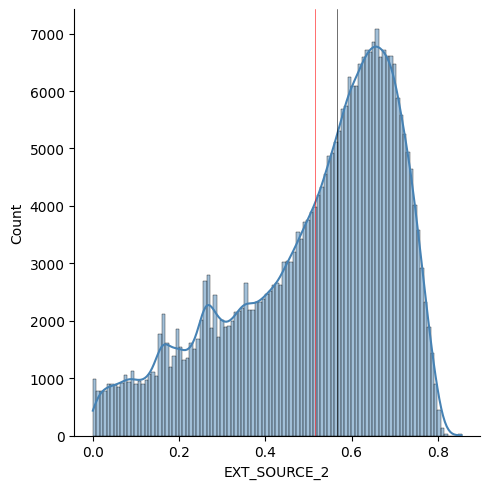

Distribution plot for :  AMT_ANNUITY


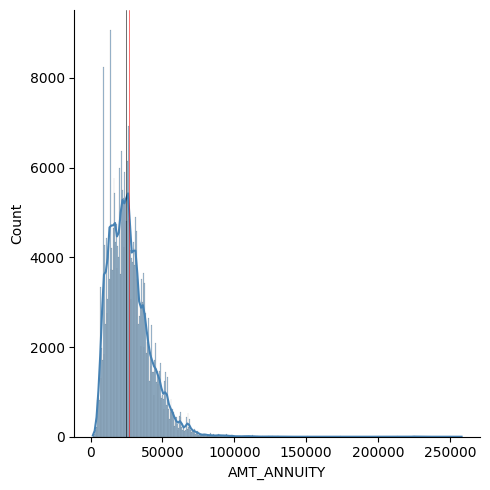

Distribution plot for :  DAYS_LAST_PHONE_CHANGE


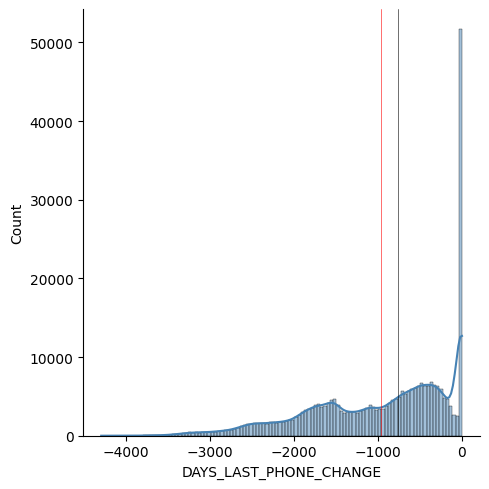

Distribution plot for :  AMT_GOODS_PRICE


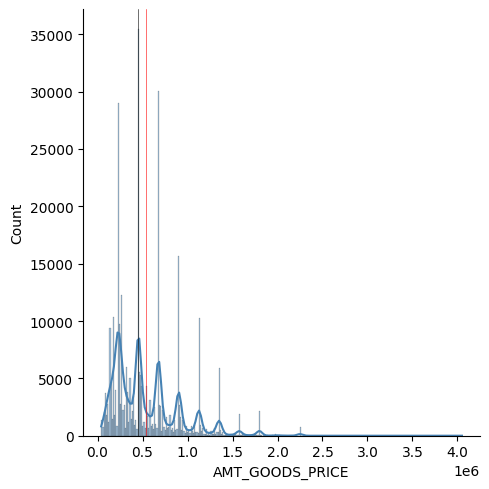

Distribution plot for :  EXT_SOURCE_3


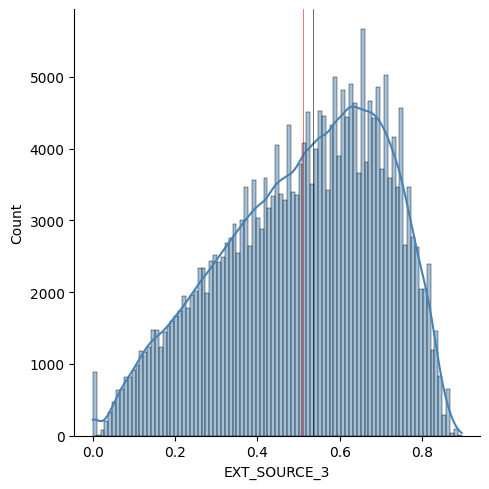

In [78]:
for i in cont_app:
    if application_data[i].isna().mean() > 0 :
        print("Distribution plot for : ",i)
        
        sns.displot(application_data[i],kde=True , color="steelblue")
        plt.axvline(application_data[i].mean(),color="red",linewidth=0.4)
        plt.axvline(application_data[i].median(),color="black",linewidth=0.4)
        plt.show()

#### Filling Missing values with Median() for continuous columns
 - The distribution plots are shifted either to right or left (means not normally distributed and presence of **outliers**)
 - Red,Black line shows mean and median position in plot respectively,if they have distance in them ,means there are outliers
 - So imputing with *Median()* in place of null values will be appropriate, as Median has no (or less) effects of outliers.

In [79]:
# Numerical columns we will fill null values with Median 
# user defined function

def fillMedian_continuous(data,columnsList):
    
    for i in columnsList:
        if data[i].isna().mean() > 0 :
            imp_val = data[i].median()
            data[i].fillna(imp_val , inplace=True)
            print("Median value is: ",imp_val,"for {} column".format(i))
        else:
            pass
        

In [80]:
fillMedian_continuous(application_data , cont_app)

#if the null % is 0.0003 we can ignore it as it is very small 
# or we can fill it with appropriate value(median) if it is adding information to the dataset

Median value is:  0.5659614260608526 for EXT_SOURCE_2 column
Median value is:  24903.0 for AMT_ANNUITY column
Median value is:  -757.0 for DAYS_LAST_PHONE_CHANGE column
Median value is:  450000.0 for AMT_GOODS_PRICE column
Median value is:  0.5352762504724826 for EXT_SOURCE_3 column


In [81]:
100*(application_data.isna().mean()).sort_values(ascending=False)

SK_ID_CURR                    0.0000
EXT_SOURCE_3                  0.0000
HOUR_APPR_PROCESS_START       0.0000
REG_REGION_NOT_LIVE_REGION    0.0000
REG_REGION_NOT_WORK_REGION    0.0000
LIVE_REGION_NOT_WORK_REGION   0.0000
REG_CITY_NOT_LIVE_CITY        0.0000
REG_CITY_NOT_WORK_CITY        0.0000
LIVE_CITY_NOT_WORK_CITY       0.0000
ORGANIZATION_TYPE             0.0000
EXT_SOURCE_2                  0.0000
OBS_30_CNT_SOCIAL_CIRCLE      0.0000
REGION_RATING_CLIENT_W_CITY   0.0000
DEF_30_CNT_SOCIAL_CIRCLE      0.0000
OBS_60_CNT_SOCIAL_CIRCLE      0.0000
DEF_60_CNT_SOCIAL_CIRCLE      0.0000
DAYS_LAST_PHONE_CHANGE        0.0000
AMT_REQ_CREDIT_BUREAU_HOUR    0.0000
AMT_REQ_CREDIT_BUREAU_DAY     0.0000
AMT_REQ_CREDIT_BUREAU_WEEK    0.0000
AMT_REQ_CREDIT_BUREAU_MON     0.0000
AMT_REQ_CREDIT_BUREAU_QRT     0.0000
WEEKDAY_APPR_PROCESS_START    0.0000
REGION_RATING_CLIENT          0.0000
TARGET                        0.0000
NAME_TYPE_SUITE               0.0000
NAME_CONTRACT_TYPE            0.0000
C

#### 🎯Data is clean from missing values in application_data
 - Lets fix missing values in previous_data now
 - After data is cleaned from both dataframes we will see the values in columns and standardise them 

### Handling missing values for previous_data
 - Imputation of appropriate data in place of null values in columns (for categorical columns, for numerical columns)

#### Segmenting columns in Continuous , Categorical , ID_columns

In [82]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [83]:
previous_data.nunique().sort_values(ascending=False)

SK_ID_PREV                     1670214
AMT_ANNUITY                     357959
SK_ID_CURR                      338857
AMT_GOODS_PRICE                  93885
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
DAYS_DECISION                     2922
SELLERPLACE_AREA                  2097
CNT_PAYMENT                         49
NAME_GOODS_CATEGORY                 28
NAME_CASH_LOAN_PURPOSE              25
HOUR_APPR_PROCESS_START             24
PRODUCT_COMBINATION                 17
NAME_SELLER_INDUSTRY                11
CODE_REJECT_REASON                   9
CHANNEL_TYPE                         8
WEEKDAY_APPR_PROCESS_START           7
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_CONTRACT_STATUS                 4
NAME_CLIENT_TYPE                     4
NAME_PRODUCT_TYPE                    3
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRA

In [84]:
# categorical columns in previous_data (where nunique is low from 2 to 28 included)
# categorical columns (cat_prev) has dtype as object as well as float and int which will be handled in later part

cat_prev = [ 'NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE',
             'HOUR_APPR_PROCESS_START', 'PRODUCT_COMBINATION',
             'NAME_SELLER_INDUSTRY', 'CODE_REJECT_REASON', 
             'CHANNEL_TYPE','WEEKDAY_APPR_PROCESS_START', 
             'NAME_PORTFOLIO', 'NAME_YIELD_GROUP',
             'NAME_PAYMENT_TYPE', 'NAME_CONTRACT_TYPE', 
             'NAME_GOODS_CATEGORY', 'NAME_CLIENT_TYPE', 
             'NAME_PRODUCT_TYPE', 'NFLAG_LAST_APPL_IN_DAY',
             'FLAG_LAST_APPL_PER_CONTRACT'
         ]



#continuous columns in previous_data (where nunique is high from 49 to 357959 included)

cont_prev = [ 'AMT_ANNUITY', 'SK_ID_CURR', 
             'AMT_GOODS_PRICE','AMT_APPLICATION', 
             'AMT_CREDIT', 'DAYS_DECISION', 
             'SELLERPLACE_AREA','CNT_PAYMENT'
           ]



         
#ID columns in previous_data (where nunique matches the total number of rows i.e. 1670214)  

id_cols_prev = [ "SK_ID_PREV" ]



# Using dataframe information and nunique, we got which columns are continuous/numerical, categorical and unique_id columns
# For categorical the nunique values is less , for continuous nunique value is higher , 
# For id_columns nunique value is equals to number of rows of dataframe

#### Analysing columns with null values
 - Imputing Mode() for categorical and Median() for continuous
 - Also checking if imputation with Mode() and Median() is logical or not, as if there is some exception 

In [85]:
100*(previous_data.isna().mean()).sort_values(ascending=False)

AMT_GOODS_PRICE               23.0818
AMT_ANNUITY                   22.2867
CNT_PAYMENT                   22.2864
PRODUCT_COMBINATION            0.0207
AMT_CREDIT                     0.0001
CODE_REJECT_REASON             0.0000
NAME_YIELD_GROUP               0.0000
NAME_SELLER_INDUSTRY           0.0000
SELLERPLACE_AREA               0.0000
CHANNEL_TYPE                   0.0000
NAME_PRODUCT_TYPE              0.0000
NAME_PORTFOLIO                 0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_CLIENT_TYPE               0.0000
SK_ID_PREV                     0.0000
NAME_PAYMENT_TYPE              0.0000
SK_ID_CURR                     0.0000
NAME_CONTRACT_STATUS           0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
HOUR_APPR_PROCESS_START        0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
AMT_APPLICATION                0.0000
NAME_CONTRACT_TYPE             0.0000
DAYS_DECISION                  0.0000
dtype: float

#### There are three continuous columns which has nearly 22% null values, 
*columns = ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']*
 - We will see and impute Mean() or Median() for these columns and also understand the data in columns 

#### There are two columns with very less null values percentage (% < 1),
*columns = ['PRODUCT_COMBINATION','AMT_CREDIT']*
 - We can ignore imputation in these columns

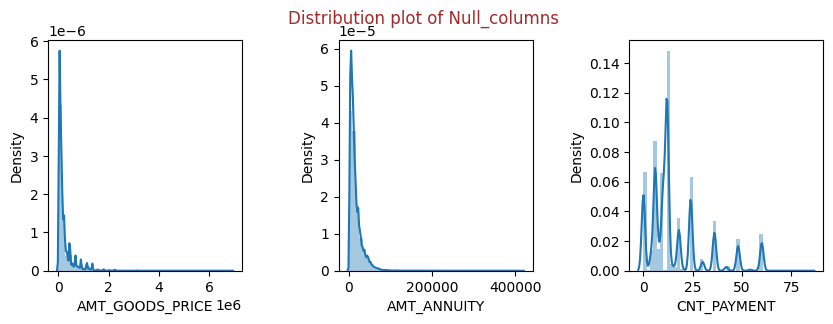

In [86]:
## we will look at if data is normalised or not in columns = ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']
## if it is not normalised then we can fill it will Median(),as Median() has no effect of outliers

## Distribution for Null_columns

Null_columns = ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT'] 

plt.figure(figsize=[10,3])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('Distribution plot of Null_columns',color="brown")

for index,col in enumerate(Null_columns):
    
    plt.subplot(1,3,index+1)
    sns.distplot(previous_data[col])
    

#### we can fill null values with Median for AMT_GOODS_PRICE and AMT_ANNUITY columns as the plots are not normalised
 - Distribution plot not normalised means there are outliers in the data
 - Imutation with Median()

In [87]:
## using user defined function

fillMedian_continuous(previous_data,columnsList=['AMT_GOODS_PRICE','AMT_ANNUITY'])

Median value is:  112320.0 for AMT_GOODS_PRICE column
Median value is:  11250.0 for AMT_ANNUITY column


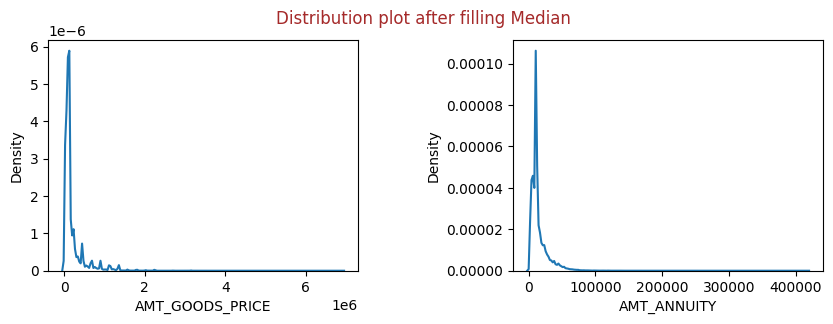

In [88]:
## histplot after filling Median
Null_columns = ['AMT_GOODS_PRICE','AMT_ANNUITY']

plt.figure(figsize=[10,3])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('Distribution plot after filling Median',color="brown")

for index,col in enumerate(Null_columns):
    
    plt.subplot(1,2,index+1)
    sns.kdeplot(previous_data[col])

In [89]:
''' CNT_PAYMENT is count as initial number of installments to repay as loan debt
The installments can only be made if the bank gave loan to the customer

We are filling missing values for CNT_PAYMENT column,so it could be a possibililty 
that the value is missing due to there was no installments made as the loan 
was not given 

Filling here with Median, Mode or some other value we have to see more details'''


100*previous_data["NAME_CONTRACT_STATUS"][previous_data["CNT_PAYMENT"].isnull()==True].value_counts(normalize=True)

NAME_CONTRACT_STATUS
Canceled       82.1549
Refused        10.9870
Unused offer    6.8571
Approved        0.0011
Name: proportion, dtype: float64

#### Most of Loan applications got Canceled where the CNT_PAYMENT is missing , we got this info from Contract Status column
 - There is no chance of installments to exist for this case,so **imputing with 0** here will make sense

In [90]:
# Filled missing value with 0 as most of the loan application got canceled where CNT_PAYMENT has missing values
previous_data["CNT_PAYMENT"].fillna(0,inplace=True)

In [91]:
100*(previous_data.isna().mean()).sort_values(ascending=False)

PRODUCT_COMBINATION           0.0207
AMT_CREDIT                    0.0001
NAME_PAYMENT_TYPE             0.0000
NAME_YIELD_GROUP              0.0000
CNT_PAYMENT                   0.0000
NAME_SELLER_INDUSTRY          0.0000
SELLERPLACE_AREA              0.0000
CHANNEL_TYPE                  0.0000
NAME_PRODUCT_TYPE             0.0000
NAME_PORTFOLIO                0.0000
NAME_GOODS_CATEGORY           0.0000
NAME_CLIENT_TYPE              0.0000
CODE_REJECT_REASON            0.0000
SK_ID_PREV                    0.0000
SK_ID_CURR                    0.0000
NAME_CONTRACT_STATUS          0.0000
NAME_CASH_LOAN_PURPOSE        0.0000
NFLAG_LAST_APPL_IN_DAY        0.0000
FLAG_LAST_APPL_PER_CONTRACT   0.0000
HOUR_APPR_PROCESS_START       0.0000
WEEKDAY_APPR_PROCESS_START    0.0000
AMT_GOODS_PRICE               0.0000
AMT_APPLICATION               0.0000
AMT_ANNUITY                   0.0000
NAME_CONTRACT_TYPE            0.0000
DAYS_DECISION                 0.0000
dtype: float64

In [92]:
application_data.shape

(307511, 47)

In [93]:
previous_data.shape

(1670214, 26)

In [94]:
# file_path_1 = 'application_data.xlsx'
# file_path_2 = 'previous_application.csv'

# # Write the DataFrame to an Excel file
# application_data.to_excel(file_path_1, index=False)
# previous_data.to_csv(file_path_2,index=False)

